In [1]:
# take production nwb spikes as input to create tensor and pandas dataframe

In [1]:
# first we need a bit of import boilerplate
import os
import scipy.sparse as sp

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys.ecephys_session import (
    EcephysSession, 
    removed_unused_stimulus_presentation_columns
)
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot
from allensdk.brain_observatory.visualization import plot_running_speed

# tell pandas to show all columns when we display a DataFrame
pd.set_option("display.max_columns", None)

In [2]:
# define ecephys session object

In [2]:
basepath = "/local1/work_allen/Ephys/nwb_files/production/ecephys_project_cache/"
manifest_path = os.path.join(basepath, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [16]:
# load session id

In [3]:
sessions_id=pd.read_csv(basepath+'sessions_id.csv', index_col=0)

In [4]:
len(sessions_id[sessions_id.session_type=='brain_observatory_1.1'].id.values)

32

In [5]:
mouse_IDs = ['306046','388523', '389262',  '408153','410344', '415149', '412809', '412804',
             '416856', '419114',  '419117', '419118', '419119', '424445',
             '415148', '416356','416861','419112','419116',
             '434488','437661','448503',
            '433891', '432105', '432104',
            '437660', '429857', '434494',
            '425597', '415148', '418196', '434836', '434845' ]  

In [7]:
mouse_IDs=['412804']

In [8]:
session_id_all = []
for mouseID in mouse_IDs:
    tmp = sessions_id[sessions_id.mouseID==int(mouseID)].id.values
    if len(tmp)>0:
        session_id_all.append(tmp[0])
    else:
        print('missing production data: '+str(mouseID))

session_id_all=sessions_id[sessions_id.session_type=='brain_observatory_1.1'].id.values

['spontaneous', 'gabors', 'flashes', 'drifting_gratings_contrast', 'natural_movie_one_more_repeats', 'natural_movie_one_shuffled', 'drifting_gratings_75_repeats', 'dot_motion']
spontaneous
1949


/home/xiaoxuanj/anaconda3/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:641: UserWarning: You've specified some overlapping time intervals between neighboring rows: [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 64), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (72, 73), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81), (81, 82), (82, 

(1949, 89, 20000)
gabors
0.0
0.25
1949


/home/xiaoxuanj/anaconda3/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:641: UserWarning: You've specified some overlapping time intervals between neighboring rows: [(0, 1)], with a maximum overlap of 0.01647460119160371 seconds.
  warnings.warn(f"You've specified some overlapping time intervals between neighboring rows: {overlapping}, "


(1949, 3645, 250)
flashes
1.7514644294192492
2.001464429419249
1949
(1949, 150, 2001)
drifting_gratings_contrast
0.5004181379890947
1.0004181379890946
1949
(1949, 540, 1000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


natural_movie_one_more_repeats
frame rate: 29.974932130786403 Hz 0.033361209814814836
1949


/home/xiaoxuanj/anaconda3/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:641: UserWarning: You've specified some overlapping time intervals between neighboring rows: [(0, 1), (2, 3), (5, 6), (8, 9), (10, 11), (11, 12), (13, 14), (14, 15), (15, 16), (17, 18), (18, 19), (20, 21), (22, 23), (23, 24), (24, 25), (26, 27), (27, 28), (30, 31), (33, 34), (34, 35), (36, 37), (37, 38), (40, 41), (42, 43), (45, 46), (46, 47), (48, 49), (49, 50), (50, 51), (52, 53), (53, 54), (54, 55), (56, 57)], with a maximum overlap of 6.299999995462713e-05 seconds.
  warnings.warn(f"You've specified some overlapping time intervals between neighboring rows: {overlapping}, "


(1949, 60, 30025)
natural_movie_one_shuffled
frame rate: 29.974931964398174 Hz 0.03336121
1949


/home/xiaoxuanj/anaconda3/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:641: UserWarning: You've specified some overlapping time intervals between neighboring rows: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19)], with a maximum overlap of 360.3010909999998 seconds.
  warnings.warn(f"You've specified some overlapping time intervals between neighboring rows: {overlapping}, "


(1949, 20, 390326)
drifting_gratings_75_repeats
1.0008363135522613
3.000836313552261
1949
(1949, 600, 3000)
dot_motion
1.0008606891749598
2.00086068917496
1949


/home/xiaoxuanj/anaconda3/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:641: UserWarning: You've specified some overlapping time intervals between neighboring rows: [(15, 16)], with a maximum overlap of 0.015850689176659216 seconds.
  warnings.warn(f"You've specified some overlapping time intervals between neighboring rows: {overlapping}, "


(1949, 495, 2000)


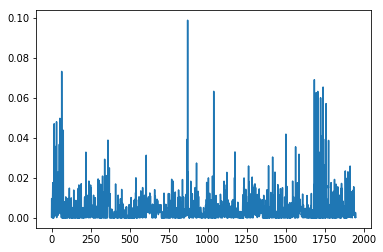

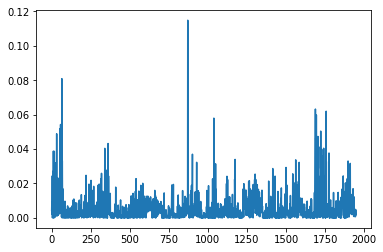

In [9]:
# get session nwb
# if session and nwb does not exist, start downloading from warehouse
for session_id in session_id_all:
    #disable default cutoff
    session = cache.get_session_data(session_id,
                                     amplitude_cutoff_maximum=np.inf,
                                     presence_ratio_minimum=-np.inf,
                                     isi_violations_maximum=np.inf)

    mouse_id = sessions_id.iloc[np.where(sessions_id.id.values==session_id)[0][0]].mouseID
    mouseID='mouse'+str(mouse_id)

    # all units in one session
    # calculate response features
    output = '/local1/work_allen/Ephys/resorted/'+mouseID
    output_path = output+'/matrix/'
    output_meta = mouseID+'_full_nwb2_meta.csv'

    f = output_path+output_meta

    df = session.units
    df = df.rename(columns={"channel_local_index": "channel_id", 
                            "ecephys_structure_acronym": "ccf", 
                            "probe_id":"probe_global_id", 
                            "probe_description":"probe_id",
                           'probe_vertical_position': "ypos"})
    df['unit_id']=df.index
    # channel_id is not strictly sorted, but roughly sorted according to depth

    keys = session.stimulus_names # just the unique values from the 'stimulus_name' column
    print(keys)

    for key in keys:
        if key!='invalid_presentation':
            print(key)
            stim_table = session.get_stimulus_table([key])
            stim_table=stim_table.rename(columns={"start_time": "Start", "stop_time": "End"})
            if 'natural_movie' in key:
                frame_times = stim_table.End-stim_table.Start
                print('frame rate:', 1/np.mean(frame_times), 'Hz', np.mean(frame_times))
                stim_table.to_csv(output_path+'stim_table_'+key+'.csv')
                # chunch each movie clip
                stim_table = stim_table[stim_table.frame==0]
                stim_table = stim_table.drop(['End'], axis=1)
                duration = np.mean(np.diff(stim_table.Start.values)[:10])
            elif key=='spontaneous':
                duration = stim_table.duration
                index = np.where(duration==max(duration))[0][0]
                if max(duration)>20: # only keep the longest spontaneous; has to be longer than 20 sec
                    w=20
                    start = np.array(list(stim_table.iloc[index].Start+np.arange(5,max(duration)-w,w)))
                    end=start+w
                    stim_table=pd.DataFrame()
                    stim_table['Start']=start
                    stim_table['End']=end
                    duration=w
            else:
                ISI = np.mean(session.get_inter_presentation_intervals_for_stimulus([key]).interval.values)
                print(ISI)
                duration = round(np.mean(stim_table.duration.values), 2)+ISI
                print(duration)

            #binarize tensor
            # binarize with 1 second bins
            time_bin_edges = np.linspace(0, duration, int(duration*1000)+1)

            # and get a set of units with only decent snr
            #decent_snr_unit_ids = session.units[
            #    session.units['snr'] >= 1.5
            #].index.values
            cortex = ['VISp', 'VISl', 'VISli', 'VISrl', 'VISal', 'VISam', 'VISpm', 'LGd', 'LP', 'CA3', 'CA1', 'DG','MB','APN']
            cortical_units_ids = np.array([idx for idx, ccf in enumerate(df.ccf.values) if ccf in cortex])
            print(len(cortical_units_ids))

            # get binarized tensor
            df_cortex = df.iloc[cortical_units_ids]
            spike_counts_da = session.presentationwise_spike_counts(
                bin_edges=time_bin_edges,
                stimulus_presentation_ids=stim_table.index.values,
                unit_ids=df_cortex.unit_id.values
            )

            matrix = spike_counts_da.values
            matrix = np.rollaxis(matrix, -1,0)
            print(matrix.shape)
            assert len(df_cortex)==matrix.shape[0]

            if 'drifting_gratings' in key:
                plt.figure()
                plt.plot(matrix.mean(1).mean(1))

            matrix_2d = matrix.reshape(matrix.shape[0], int(len(matrix.flatten())/matrix.shape[0]))
            sparse_matrix = sp.csc_matrix(matrix_2d)    
            np.savez(output_path+key+'_full_nwb2.npz',[sparse_matrix, matrix.shape])

            if 'natural_movie' not in key:
                stim_table.to_csv(output_path+'stim_table_'+key+'.csv')

            if 'drifting_gratings' in key:
                df_cortex['FR']=(matrix[:,:,50:250].sum(2)/float(200)*1000).mean(1)  
                df_cortex.to_csv(f, encoding='utf-8')


In [8]:
session_id

781842082

2.0
342
(342, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
291
(291, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
244
(244, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
279
(279, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
224


/home/xiaoxuanj/anaconda3/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1062: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


(224, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
308
(308, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
355
(355, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
290
(290, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
429
(429, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
264
(264, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
432
(432, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
364
(364, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
387
(387, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
278
(278, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
275


/home/xiaoxuanj/anaconda3/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1062: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


(275, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
346


/home/xiaoxuanj/anaconda3/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1062: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


(346, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
371
(371, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
254
(254, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
251
(251, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
219
(219, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
411
(411, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
318
(318, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
242
(242, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
429
(429, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.0
520
(520, 600, 2000)


/home/xiaoxuanj/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/xiaoxuanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


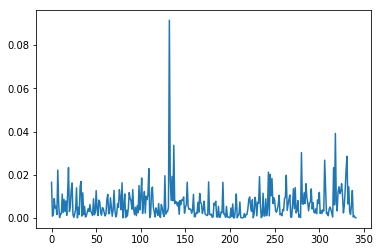

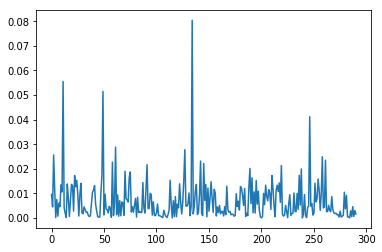

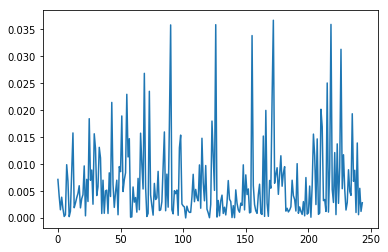

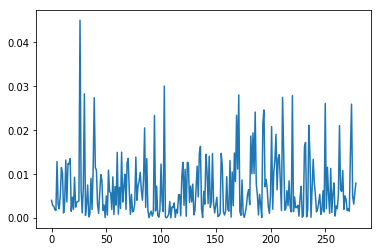

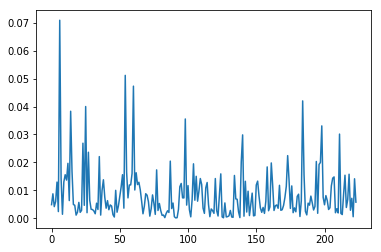

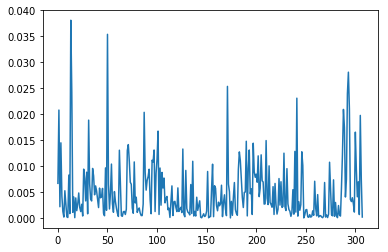

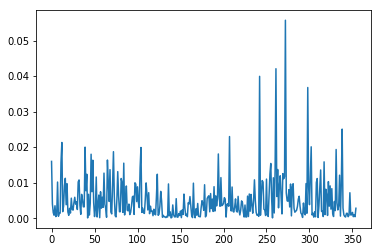

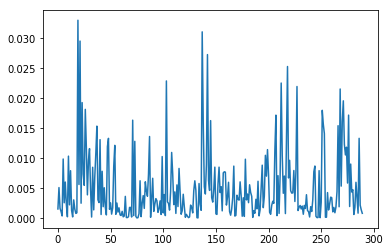

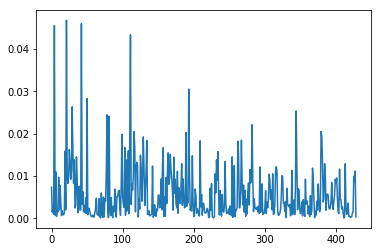

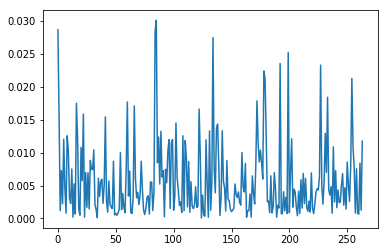

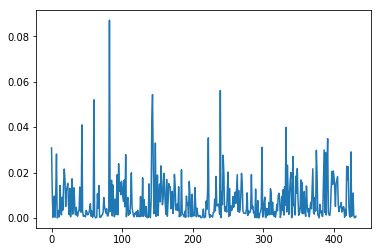

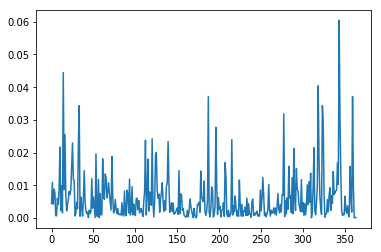

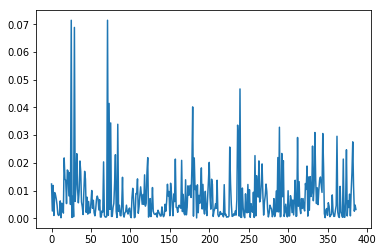

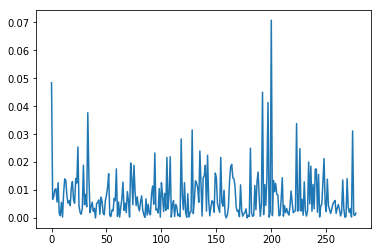

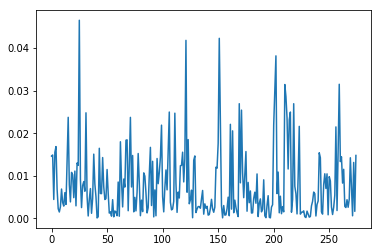

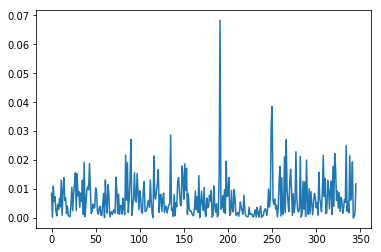

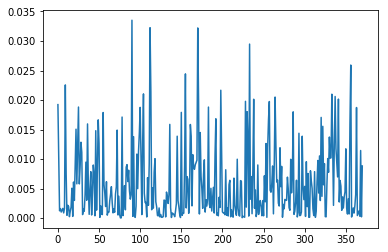

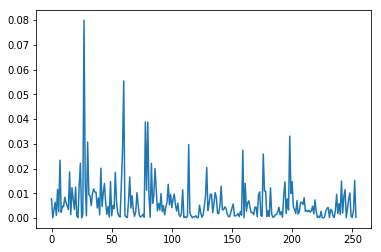

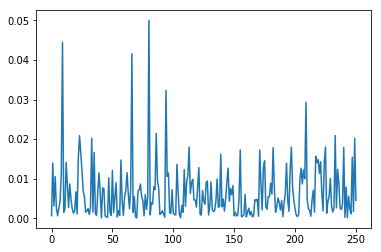

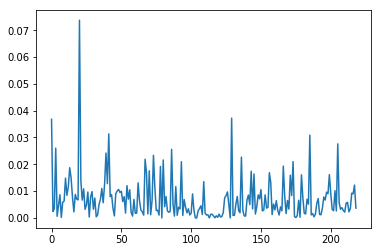

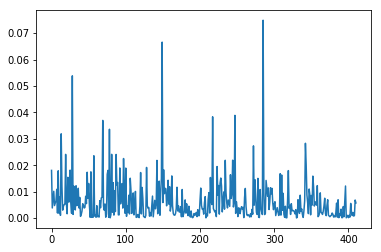

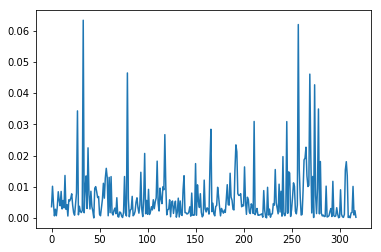

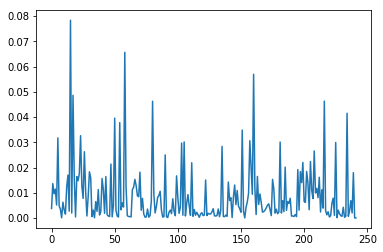

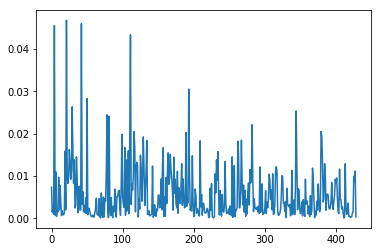

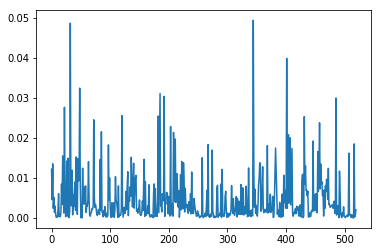

In [12]:
# get session nwb
# if session and nwb does not exist, start downloading from warehouse
for session_id in session_id_all:
    session = cache.get_session_data(session_id)

    mouse_id = sessions_id.iloc[np.where(sessions_id.id.values==session_id)[0][0]].mouseID
    mouseID='mouse'+str(mouse_id)

    # all units in one session
    # calculate response features
    output = '/local1/work_allen/Ephys/resorted/'+mouseID
    output_path = output+'/matrix/'
    output_meta = mouseID+'_cortex_nwb2_meta.csv'

    f = output_path+output_meta

    df = session.units
    df = df.rename(columns={"channel_local_index": "channel_id", 
                            "ecephys_structure_acronym": "ccf", 
                            "probe_id":"probe_global_id", 
                            "probe_description":"probe_id",
                           'probe_vertical_position': "ypos"})
    df['unit_id']=df.index
    # channel_id is not strictly sorted, but roughly sorted according to depth

    key = 'drifting_gratings_75_repeats'
    stim_table = session.get_stimulus_table([key])
    stim_table=stim_table.rename(columns={"start_time": "Start", "stop_time": "End"})
    duration = round(np.mean(stim_table.duration.values), 2)
    print(duration)

    #binarize tensor
    # binarize with 1 second bins
    time_bin_edges = np.linspace(0, duration, int(duration*1000)+1)

    # and get a set of units with only decent snr
    #decent_snr_unit_ids = session.units[
    #    session.units['snr'] >= 1.5
    #].index.values
    cortex = ['VISp', 'VISl', 'VISli', 'VISrl', 'VISal', 'VISam', 'VISpm']
    cortical_units_ids = np.array([idx for idx, ccf in enumerate(df.ccf.values) if ccf in cortex])
    print(len(cortical_units_ids))

    # get binarized tensor
    df_cortex = df.iloc[cortical_units_ids]
    spike_counts_da = session.presentationwise_spike_counts(
        bin_edges=time_bin_edges,
        stimulus_presentation_ids=stim_table.index.values,
        unit_ids=df_cortex.unit_id.values
    )

    matrix = spike_counts_da.values
    matrix = np.rollaxis(matrix, -1,0)
    print(matrix.shape)
    assert len(df_cortex)==matrix.shape[0]

    plt.figure()
    plt.plot(matrix.mean(1).mean(1))

    df_cortex['FR']=(matrix[:,:,50:250].sum(2)/float(200)*1000).mean(1)  
    df_cortex.to_csv(f, encoding='utf-8')


In [10]:
keys

['spontaneous',
 'gabors',
 'flashes',
 'drifting_gratings_contrast',
 'natural_movie_one_more_repeats',
 'natural_movie_one_shuffled',
 'drifting_gratings_75_repeats',
 'dot_motion']